<a href="https://colab.research.google.com/github/Priyanka9-9/Machine-learning-/blob/main/analysis_on_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory data analysis on titanic dataset


**mounting** **on** **drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**importing** **libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading** **the** **csv** **file**

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Data analytics/titanic dataset/titanic_train.csv')

**getting** **details** **of** **data**

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**looking** **for** **missing** **values**


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**looking** **for** **percentage** **of** **missing** **values**

In [9]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

**Drop columns with missing values greater than 50%**

In [10]:
train=train.drop(train.columns[train.isnull().mean()>0.5],axis=1)

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

**filling missing embarked with mode value**

In [12]:
train.Embarked.mode()

0    S
dtype: object

In [13]:
train['Embarked']=train['Embarked'].fillna("S")

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

**manipultaing age column missing values**

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Univariate analysis**

In [18]:
train.skew()

<ipython-input-18-1d3a3c99b9d6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.548256
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [19]:
train.kurt()

<ipython-input-19-0b202586050e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.kurt()


PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.782790
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

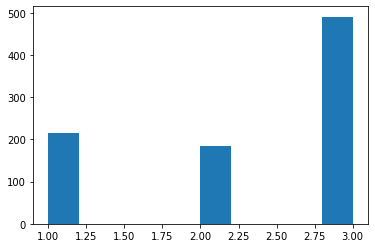

In [20]:
plt.hist(train['Pclass'])


(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

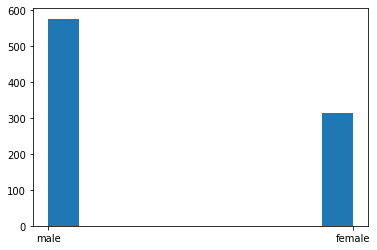

In [21]:
plt.hist(train['Sex'])

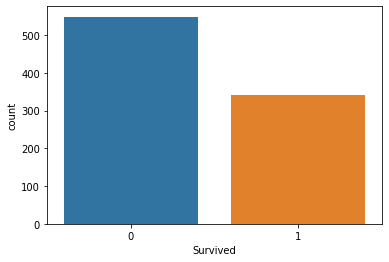

In [22]:
sns.countplot(x='Survived',data=train)


**Bivariate Analysis**

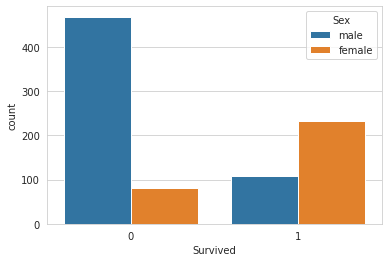

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

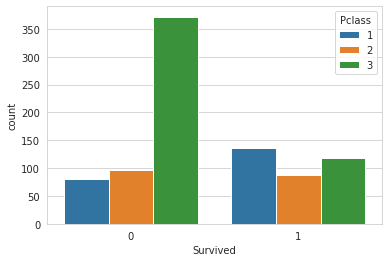

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


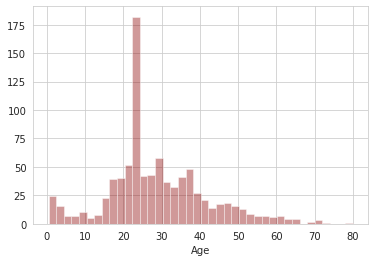

In [25]:
sns.distplot(train['Age'],kde=False,color='darkred',bins=40)

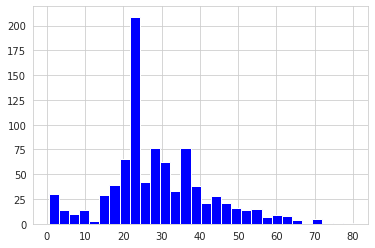

In [26]:
train['Age'].hist(bins=30,color='Blue')

(array([ 54.,  46., 313., 180., 148.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

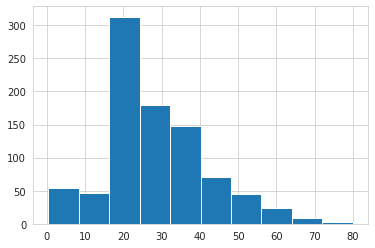

In [27]:
plt.hist(train['Age'])

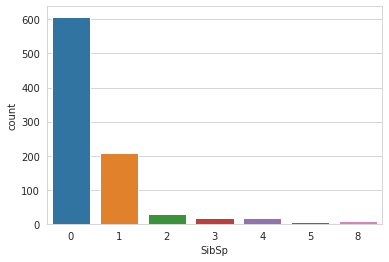

In [28]:
sns.countplot(x='SibSp',data=train)

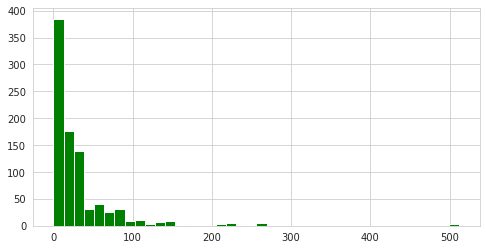

In [29]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

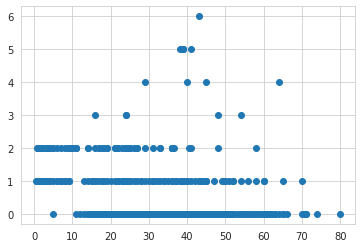

In [30]:
plt.scatter(train.Age, train.Parch)

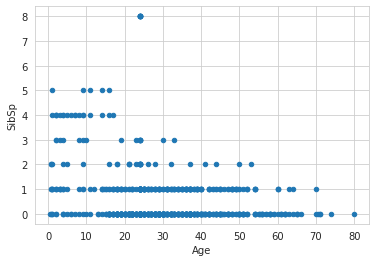

In [31]:
train.plot.scatter(x='Age', y='SibSp')

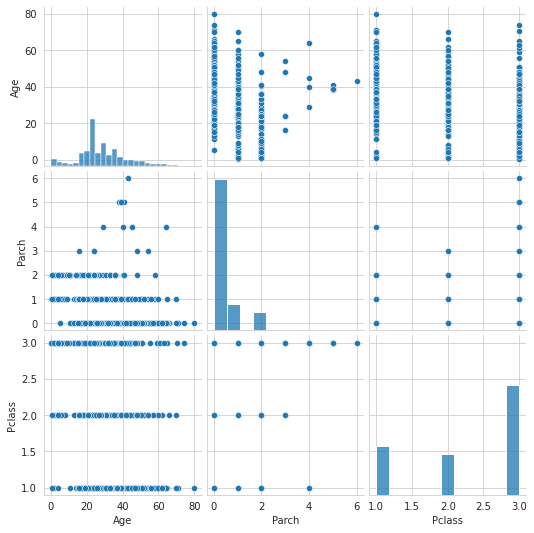

In [32]:
sns.pairplot(data=train, vars=['Age', 'Parch', 'Pclass'])

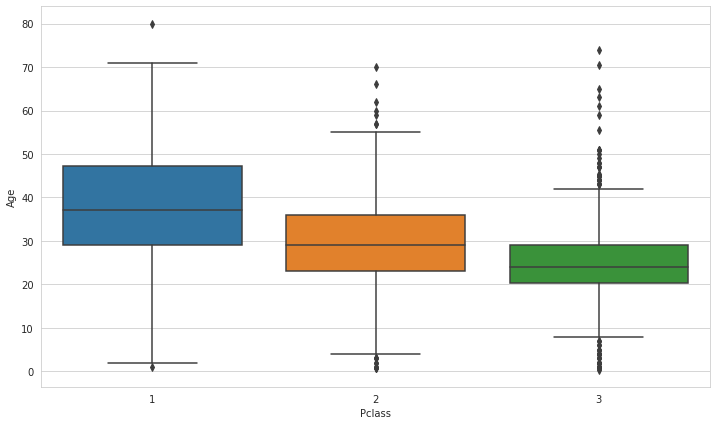

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

**Converting Categorical Features**
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.




In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [35]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [36]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [37]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [38]:
train = pd.concat([train,sex,embark],axis=1)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [40]:
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.548256
SibSp          3.695352
Parch          2.749117
Fare           4.787317
male          -0.618921
Q              2.948778
S             -1.009665
dtype: float64

In [41]:
train['Fare']=np.cbrt(train['Fare'])

In [42]:
train['Fare'].skew()

1.2303822111719211

In [43]:
train['SibSp']=np.sqrt(train['SibSp'])

In [44]:
train['Parch']=np.sqrt(train['Parch'])

In [45]:
train['S']=np.sqrt(train['S'])

In [46]:
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.548256
SibSp          1.436526
Parch          1.529799
Fare           1.230382
male          -0.618921
Q              2.948778
S             -1.009766
dtype: float64

skewness is between -1 and plus 1 now



In [47]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.063602,0.000348,-0.002219,0.042939,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.047255,0.043535,0.121652,0.322398,-0.543351,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.006049,-0.006792,-0.656224,0.131900,0.221009,0.074053
Age,0.035840,-0.047255,-0.408487,1.000000,-0.217433,-0.227287,0.146228,0.078421,-0.081658,0.015733
SibSp,-0.063602,0.043535,0.006049,-0.217433,1.000000,0.473591,0.341246,-0.173428,-0.041929,0.039705
Parch,0.000348,0.121652,-0.006792,-0.227287,0.473591,1.000000,0.339481,-0.257096,-0.095097,0.049494
Fare,-0.002219,0.322398,-0.656224,0.146228,0.341246,0.339481,1.000000,-0.251434,-0.151572,-0.147845
male,0.042939,-0.543351,0.131900,0.078421,-0.173428,-0.257096,-0.251434,1.000000,-0.074115,0.119224
Q,-0.033606,0.003650,0.221009,-0.081658,-0.041929,-0.095097,-0.151572,-0.074115,1.000000,-0.499421
S,0.022204,-0.149683,0.074053,0.015733,0.039705,0.049494,-0.147845,0.119224,-0.499421,1.000000


In [48]:
X=train.drop('Survived', axis=1)
y=train['Survived']

In [49]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1.0,0.0,1.935438,1,0,1.0
1,2,1,38.0,1.0,0.0,4.146318,0,0,0.0
2,3,3,26.0,0.0,0.0,1.993730,0,0,1.0
3,4,1,35.0,1.0,0.0,3.758647,0,0,1.0
4,5,3,35.0,0.0,0.0,2.004158,1,0,1.0


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=101)

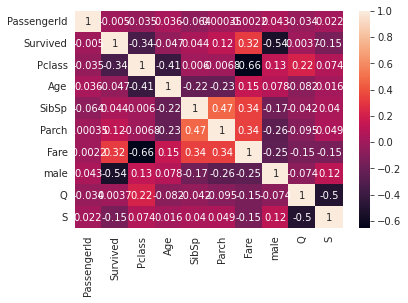

In [52]:
sns.heatmap(train.corr(), annot=True)

Great! Our data is ready for our model!

Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

Train Test Split

In [53]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1.0,0.0,1.935438,1,0,1.0
1,2,1,38.0,1.0,0.0,4.146318,0,0,0.0
2,3,3,26.0,0.0,0.0,1.993730,0,0,1.0
3,4,1,35.0,1.0,0.0,3.758647,0,0,1.0
4,5,3,35.0,0.0,0.0,2.004158,1,0,1.0


Training and Predicting

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix


In [58]:
accuracy=confusion_matrix(y_test,predictions)

In [59]:
accuracy

array([[133,  21],
       [ 40,  74]])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7723880597014925

In [62]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

Let's move on to evaluate our model!

Evaluation

We can check precision,recall,f1-score using classification report!

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

